In [ ]:
## Generate a distored ellispiodal laser distribution

In [259]:
from scipy.stats import qmc
import numpy as np
import matplotlib.pyplot as plt
import mpl_scatter_density
import generatorTool as gt 
cMap = plt.cm.get_cmap('gist_earth_r').copy()
cMap.set_under('white')

In [276]:
## params, default to 2, use larger for triangle shapes
params = 2
radius = 3e-3
laser_pulse_length = 10e-12
dist = "ellipsoid"
perturbed = True
assert dist in ["triangle", "cone1", "cone2", "ellipsoid"]

In [277]:
N = 2**17 * 3
N = 200000 * 2
N = 25000
N = 100000
print(N)
print(int(N/3))
sampler = qmc.Sobol(d=4)

100000
33333


In [287]:
def diverge_fac(zs, a=0.67, b=4, c=2.5):
    """
    a controls diverging tail location
    b controls steepness
    c controls amplitude 
    """
    return 1 + np.power((np.abs(zs)>a) * np.sqrt(np.abs(zs**2 - a**2)),b)*c

def draw_ellipse(ax, a=1,b=1,**kwargs):
    x_ = np.linspace(-a,a,101)
    ax.plot(x_, np.sqrt(1-(x_/a)**2)*b,**kwargs)
    ax.plot(x_,-np.sqrt(1-(x_/a)**2)*b,**kwargs)

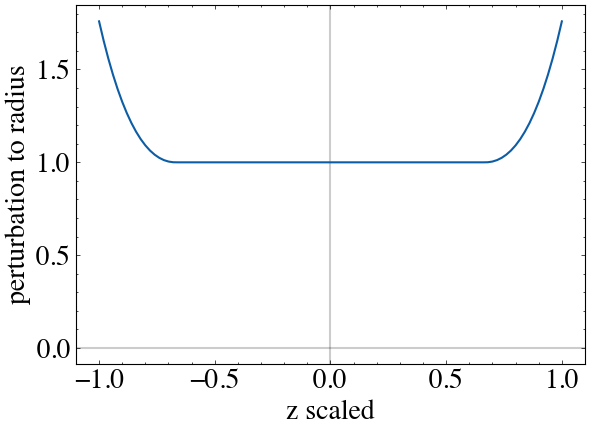

In [299]:
zs = np.linspace(-1,1,101)
# rs = np.linspace(-1,1,101)
# ZS, RS = np.meshgrid(zs,rs)
# fs = (zs > 0) * (-(zs-1)**2 + 1) + (zs < 0) * (-(zs+1)**2 + 1)
# fs = np.
fig, ax = plt.subplots()
ax.axhline(0, alpha=.2,color='k')
ax.axvline(0, alpha=.2,color='k')
# ax.contour(ZS,RS,(ZS**2 - RS**2),colors='k')
ax.plot(zs, diverge_fac(zs))
ax.set_xlabel("z scaled")
ax.set_ylabel("perturbation to radius")
fig.tight_layout()
plt.show()

## start from here

In [280]:
sampler.reset()
sample = sampler.random(N)
x, y, z, z_ = sample[:,0], sample[:,1], sample[:,2], sample[:,3]

/var/folders/9q/89ldym6x6cn42rmljbqmy2940000gn/T/ipykernel_33225/1232197064.py:2: UserWarning: The balance properties of Sobol' points require n to be a power of 2.
  sample = sampler.random(N)


## generate

In [281]:
if dist == "triangle":
    r = x 
    phi = y * np.pi * 2
    x = np.sqrt(r) * np.cos(phi)
    y = np.sqrt(r) * np.sin(phi)

    z = np.power(z,1/params)
    z = 1-z
    
elif dist == "cone1":
    r = x 
    phi = y * np.pi * 2
    x = np.sqrt(r) * np.cos(phi)
    y = np.sqrt(r) * np.sin(phi)

    condition = (x**2 + y**2 < np.power((1-z),params))
    x = x[condition]
    y = y[condition]
    z = z[condition]
    print(x.shape)

elif dist == "cone2":
    # https://stackoverflow.com/questions/41749411/uniform-sampling-by-volume-within-a-cone
    # volume
    h = np.power(x, 1/3)
    r = h * np.power(y, 1/2)
    t = 2 * np.pi * z

    # surface
    # h = np.sqrt(x)
    # r = h
    # t = 2 * np.pi * z

    x = r * np.cos(t)
    y = r * np.sin(t)
    z = 1-h
    
elif dist == "ellipsoid":
    theta = 2 * np.pi * x
    phi = np.arccos(2 * y - 1)
    rad = np.power(z, 1/3) 
    
    z = rad * np.cos(phi)
    
    if perturbed:
        rad = rad * diverge_fac(z)

    x = rad * np.cos(theta) * np.sin(phi)
    y = rad * np.sin(theta) * np.sin(phi)
   

In [282]:
print(f"{x.max() = :.4f}, {x.min() = :.4f}")
print(f"{y.max() = :.4f}, {y.min() = :.4f}")
print(f"{z.max() = :.4f}, {z.min() = :.4f}")

x.max() = 0.9959, x.min() = -0.9948
y.max() = 0.9944, y.min() = -0.9963
z.max() = 0.9957, z.min() = -0.9985


## add peturbation to tail

- 

## plot

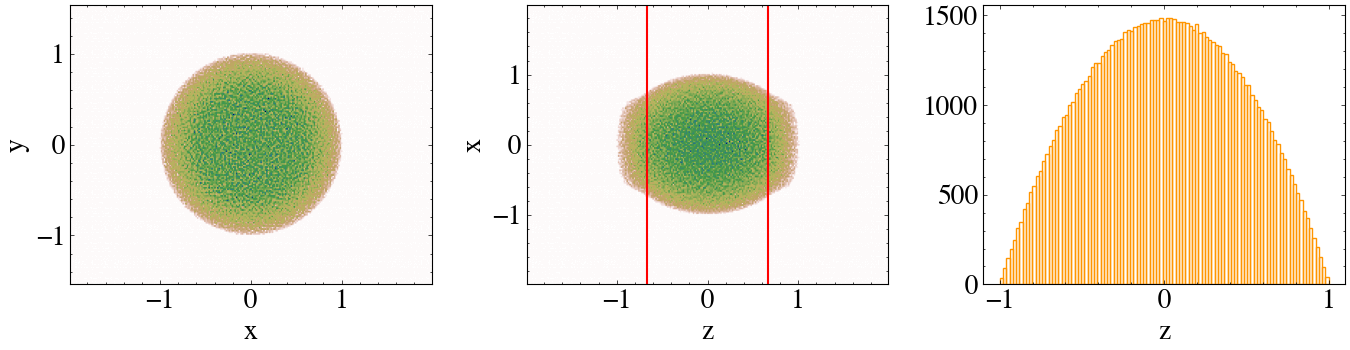

In [296]:
fig = plt.figure(figsize=(14,4))
ax1 = fig.add_subplot(1, 3, 1, projection='scatter_density')
ax2 = fig.add_subplot(1, 3, 2, projection='scatter_density')
ax3 = fig.add_subplot(1, 3, 3)
ax1.scatter_density(x,y,cmap=cMap)
ax2.scatter_density(z,x,cmap=cMap)
ax3.hist(z,101,ec='C2',fc="None")
ax1.set(xlim=(-2*x.max(),2*x.max()),ylim=(-2*x.max(),2*x.max()))
ax2.set(xlim=(-2*x.max(),2*x.max()),ylim=(-2*z.max(),2*z.max()))
ax1.axis('equal')

ax2.axvline(x=-1.5*z.std(),color='red')
ax2.axvline(x=1.5*z.std(),color='red')

# draw_ellipse(ax2,color="k",alpha=1,lw=0.8,ls="-.")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax2.set_xlabel("z")
ax2.set_ylabel("x")
ax3.set_xlabel("z")

fig.tight_layout()
plt.show()

## rescale

In [268]:
x = (2 * x - x.min() - x.max()) / (x.max() - x.min()) * radius
y = (2 * y - y.min() - y.max()) / (y.max() - y.min()) * radius
z = (z - z.min()) / (z.max() - z.min()) * laser_pulse_length

In [269]:
print(len(x))
print(f"{x.max() = :.3e}, {x.min() = :.3e}, {x.std() = :.3e}")
print(f"{y.max() = :.3e}, {y.min() = :.3e}, {y.std() = :.3e}")
print(f"{z.max() = :.3e}, {z.min() = :.3e}, {z.std() = :.3e}")

100000
x.max() = 3.000e-03, x.min() = -3.000e-03, x.std() = 1.353e-03
y.max() = 3.000e-03, y.min() = -3.000e-03, y.std() = 1.352e-03
z.max() = 1.000e-11, z.min() = 0.000e+00, z.std() = 2.239e-12


## momentum

In [270]:
def momt_thermal_iso (N, Ekin=0.55):
    '''
    generates an isotropic momentum distributions:
    - N:   number of macroparticles  
    - Ekin: excess in kinetic energy (Ekin~h\nu-Phi), 
    '''
    m_ec2 = 0.51099895e6
    cms = 299792458
    p = np.sqrt(Ekin**2 + 2 * Ekin * m_ec2) 

    print ("total momentum", p) 

    sampler = qmc.Sobol(d=4)
    sampler.reset()
    U = sampler.random(N)
    t=U[:,2]
    u=U[:,3]
    v=U[:,0]
    w=U[:,1]

    phi = 2*np.pi*t
    the = np.arccos(u) 
    #   the = np.pi/2*u  non isotopic
    PX = p*np.sin(the)*np.cos(phi)
    PY = p*np.sin(the)*np.sin(phi)
    PZ = p*np.cos(the) 
    print ("mean z momentum", np.mean(PZ)) 
    print ("rms x momentum", np.std(PX)) 
    print ("rms y momentum", np.std(PY)) 

    return (PX, PY, PZ)

In [271]:
PX, PY, PZ = momt_thermal_iso(len(x))

total momentum 749.7327173733318
mean z momentum 374.8663583375445
rms x momentum 432.86081621696843
rms y momentum 432.85596975428746


/var/folders/9q/89ldym6x6cn42rmljbqmy2940000gn/T/ipykernel_33225/939196867.py:15: UserWarning: The balance properties of Sobol' points require n to be a power of 2.
  U = sampler.random(N)


In [272]:
PP = PX**2 + PY**2 + PZ**2

## write to IMPACT

In [273]:
def write_partcl_data(X, Y, T, PX, PY, PZ):
    m_ec2 = 0.51099895e6
    cms = 299792458
  
    TotalEmissionTimeSec = np.abs(np.max(T)-np.min(T))
    N = len(X)
    aux = 0.0
    bgx   = PX/m_ec2
    bgy   = PY/m_ec2
    bgz   = PZ/m_ec2
    bg    = np.sqrt (bgx**2 + bgy**2 + bgz**2)
    gamma = np.sqrt (bg**2+1.) 
    betaz = bg/gamma
    Z = (T-np.max(T))*cms*np.mean(betaz)+1e-16
    zMean = np.mean(Z)
    bgzMean    = np.mean(bgz)
    
    with open("partcl.data", "w") as fid:
        fid.write (str(N+1)+'\n')

        fid.write('{:19.12e}'.format(aux)+'{:19.12e}'.format(aux)+'{:19.12e}'.format(aux)+  \
                 '{:19.12e}'.format(aux)+'{:19.12e}'.format(zMean)+'{:19.12e}'.format(bgzMean)+'\n')
        for i in range(N):
            fid.write('{:19.12e}'.format(X[i])+'{:19.12e}'.format(bgx[i])+'{:19.12e}'.format(Y[i])+  \
                '{:19.12e}'.format(bgy[i])+'{:19.12e}'.format(Z[i])+'{:19.12e}'.format(bgz[i])+'\n')

In [274]:
gt.dump_ImpactT_cathode(x,y,z,PX,PY,PZ)

Total Emission time [sec]  = 1e-11
Mean gamma          [-]    = 1.0000010767401106
Mean beta           [-]    = 0.0014674729107592714
Mean Kinetic Energy [eV]   = 0.5501065226853825
Mean momentm        [eV/c] = 749.732717373332
Sigma_z             [m]    = 9.848039502759333e-07


In [275]:
!head partcl.data

100001
  0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00 -2.19906e-06  7.33737e-04
  7.35816e-04 -1.14892e-03 -9.78666e-04 -3.32058e-04 -1.19233e-06  8.50409e-04
 -8.21428e-04 -6.69536e-04  2.49425e-03  1.29147e-03 -3.15989e-06  1.93150e-04
  1.94681e-03  1.49642e-04  1.16847e-03 -6.53705e-04 -2.12520e-06  1.30528e-03
 -1.71547e-03  1.26114e-03 -2.92326e-05  5.63808e-04 -3.72981e-06  4.95112e-04
 -5.53477e-04 -1.34948e-03 -2.43206e-03  3.44814e-05 -1.26072e-06  5.75499e-04
  6.64232e-04 -4.85370e-04  6.76288e-04 -6.89131e-04 -2.92975e-06  1.20125e-03
 -1.66212e-03  1.19926e-04  2.20921e-04  1.45827e-03 -7.96506e-07  1.12045e-04
  1.76993e-03  8.73028e-04 -9.41090e-04 -6.94053e-04 -2.27873e-06  9.53726e-04
